# Assignment: Compresive Strength Concrete Problem


### Abstract: 

Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.  <br><br>

<table border="1"  cellpadding="6" bordercolor="red">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">1030</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">9</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">2007-08-03</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Regression</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">231464</p></td>
	</tr>
    </tbody>
    </table>

###  Description:
| Features Name | Data Type | Measurement | Description |
| -- | -- | -- | -- |
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable
Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable
Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable
Water (component 4) | quantitative | kg in a m3 mixture | Input Variable
Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable
Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable
Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable
Age | quantitative | Day (1~365) | Input Variable
Concrete compressive strength | quantitative | MPa | Output Variable

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature )
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
- Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
- Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
- Train the Model with Epochs (100) and validate it
- If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/compresive_strength_concrete.csv)

In [2]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
import numpy as np
df=pd.read_csv("compresive_strength_concrete.csv")
df.isnull().sum()

Saving compresive_strength_concrete.csv to compresive_strength_concrete.csv


Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [14]:
dfX=df.iloc[:,:8]
dfY=df.iloc[:,8:9]
train_X,train_Y = dfX.iloc[:515],dfY.iloc[:515]
train_X=(train_X-train_X.mean())/train_X.std()
train_Y=(train_Y-train_Y.mean())/train_Y.std()

validate_X, validate_Y =dfX.iloc[515:824],dfY.iloc[515:824]
validate_X=(validate_X-train_X.mean())/train_X.std()
validate_Y=(validate_Y-train_Y.mean())/train_Y.std()


test_X, test_Y = dfX.iloc[824:],dfY.iloc[824:]
test_X=(test_X-train_X.mean())/train_X.std()
test_Y=(test_Y-train_Y.mean())/train_Y.std()

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD

model = Sequential()
model.add(Dense(10, input_shape = (train_X.shape[1],), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                90        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 239
Trainable params: 239
Non-trainable params: 0
_________________________________________________________________


In [18]:
import tensorflow as tf
model.compile(loss='mean_squared_error', optimizer="rmsprop",metrics = ("accuracy"))
strenght=model.fit(train_X, train_Y, 
	validation_data=(validate_X, validate_Y),
	epochs=100, batch_size=1)

Epoch 1/100
515/515 [==============================] - 2s 2ms/step - loss: 0.0831 - accuracy: 0.0000e+00 - val_loss: 41988.7266 - val_accuracy: 0.0000e+00
Epoch 2/100
515/515 [==============================] - 1s 2ms/step - loss: 0.0850 - accuracy: 0.0000e+00 - val_loss: 42540.4844 - val_accuracy: 0.0000e+00
Epoch 3/100
515/515 [==============================] - 1s 2ms/step - loss: 0.0893 - accuracy: 0.0000e+00 - val_loss: 38827.6523 - val_accuracy: 0.0000e+00
Epoch 4/100
515/515 [==============================] - 1s 2ms/step - loss: 0.0736 - accuracy: 0.0000e+00 - val_loss: 37292.4180 - val_accuracy: 0.0000e+00
Epoch 5/100
515/515 [==============================] - 1s 2ms/step - loss: 0.0784 - accuracy: 0.0000e+00 - val_loss: 43431.4258 - val_accuracy: 0.0000e+00
Epoch 6/100
515/515 [==============================] - 1s 2ms/step - loss: 0.0653 - accuracy: 0.0000e+00 - val_loss: 42058.4570 - val_accuracy: 0.0000e+00
Epoch 7/100
515/515 [==============================] - 1s 2ms/step - l

In [20]:
e= strenght.history
ef=pd.DataFrame(e)
ef

,loss,accuracy,val_loss,val_accuracy
0,0.079416,0.0,41988.726562,0.0
1,0.080570,0.0,42540.484375,0.0
2,0.081782,0.0,38827.652344,0.0
3,0.079183,0.0,37292.417969,0.0
4,0.079428,0.0,43431.425781,0.0
...,...,...,...,...
95,0.071180,0.0,298058.687500,0.0
96,0.078287,0.0,251914.328125,0.0
97,0.076160,0.0,315080.625000,0.0
98,0.075338,0.0,271325.906250,0.0


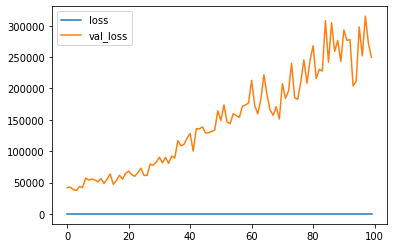

In [21]:
ef.plot( y = ['loss', 'val_loss'])

7/7 [==============================] - 0s 2ms/step - loss: 467576.8438 - accuracy: 0.0000e+00


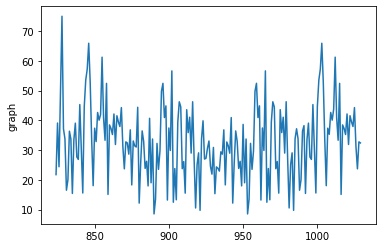

In [27]:
import matplotlib.pyplot as plt

model.evaluate(test_X,test_Y)
plt.plot(test_Y)
plt.ylabel('graph')
plt.show()

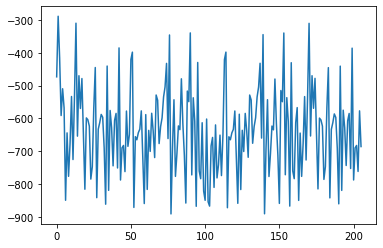

In [24]:

plt.plot(model.predict(test_X))
plt.show()